# Exploratory Data Analysis Case Study - Amazon Best Seller Products

### Goal : The goal of this EDA is to uncover patterns, trends, and insights in the Amazon Best Seller Products dataset that can inform product strategy, pricing decisions, and marketing efforts. This can include identifying key factors that contribute to a product becoming a best seller, understanding customer preferences based on ratings and reviews, and analyzing the impact of discounts and promotions.

### Metadata:


1. timestamp = The date when the product data was captured.
2. product_name = The name of the product listed on Amazon.
3. brand = The brand name of the product.
4. initial_price = The original price of the product before any discounts are applied.
5. final_price = The price of the product after discounts are applied.
6. discount = Indicates whether the product was sold at a discount (TRUE or FALSE).
7. reviews_count = The total number of reviews the product has received.
8. categories = The specific category or categories under which the product is listed on Amazon.
9. root_bs_rank = The root-level best seller rank of the product across Amazon.
10. rating = The average customer rating for the product (on a scale of 1 to 5).
11. plus_content = Indicates whether the product includes enhanced content (A+ content) on its Amazon page (TRUE or FALSE).
12. bs_category = Indicates whether the product is in a specific best seller category (TRUE or FALSE).
13. num1_bs = Indicates whether the product is the number one best seller in its category (TRUE or FALSE).
14. amazon_choice = Indicates whether the product is marked as an Amazon Choice product (TRUE or FALSE).



###Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/CABA DATA/Amazon products.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,timestamp,product_name,brand,initial_price,final_price,discount,reviews_count,categories,root_bs_rank,rating,plus_content,bs_category,num1_bs,amazon_choice
0,10/9/2022,"Dorco Tinkle Eyebrow Razor, Hair Trimmer Shave...",Tinkle,4.25,4.25,False,"92,687",Beauty & Personal Care,35,4.6,True,NaN,False,False
1,4/16/2024,"All-New Blink Outdoor 4 (4th Gen) Mount 3PCS, ...",Fieybirt,9.99,5.99,True,7,Electronics,56,4.3,True,NaN,False,False
2,8/2/2023,"rabbitgoo Dog Harness, No-Pull Pet Harness wit...",Rabbitgoo,24.12,22.98,True,"156,074",Pet Supplies,63,4.5,True,NaN,False,False
3,10/6/2022,StarTech.com Standalone 1 to 2 USB Thumb Drive...,StarTech,131.66,131.66,False,272,Electronics,8,4.5,True,NaN,False,False
4,10/1/2022,BGment Blackout Curtains - Grommet Thermal Ins...,BGment,38.99,21.59,True,"50,016",Home & Kitchen,86,4.6,True,NaN,False,False


### Understanding the Data Structure

In [ ]:
df.columns

Index(['timestamp', 'product_name', 'brand', 'initial_price', 'final_price',
       'discount', 'reviews_count', 'categories', 'root_bs_rank', 'rating',
       'plus_content', 'bs_category', 'num1_bs', 'amazon_choice'],
      dtype='object')

In [ ]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1000 non-null   object 
 1   product_name   1000 non-null   object 
 2   brand          1000 non-null   object 
 3   initial_price  1000 non-null   float64
 4   final_price    1000 non-null   float64
 5   discount       1000 non-null   bool   
 6   reviews_count  1000 non-null   object 
 7   categories     1000 non-null   object 
 8   root_bs_rank   1000 non-null   int64  
 9   rating         1000 non-null   float64
 10  plus_content   1000 non-null   bool   
 11  bs_category    156 non-null    object 
 12  num1_bs        1000 non-null   bool   
 13  amazon_choice  1000 non-null   bool   
dtypes: bool(4), float64(3), int64(1), object(6)
memory usage: 82.2+ KB


In [ ]:
pd.to_datetime(df['timestamp'])

,timestamp
0,2022-10-09
1,2024-04-16
2,2023-08-02
3,2022-10-06
4,2022-10-01
...,...
995,2024-04-16
996,2024-05-13
997,2022-10-02
998,2023-05-30


In [ ]:
# change review_count column to integer
df['reviews_count'] = df['reviews_count'].str.replace(',', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1000 non-null   object 
 1   product_name   1000 non-null   object 
 2   brand          1000 non-null   object 
 3   initial_price  1000 non-null   float64
 4   final_price    1000 non-null   float64
 5   discount       1000 non-null   bool   
 6   reviews_count  1000 non-null   int64  
 7   categories     1000 non-null   object 
 8   root_bs_rank   1000 non-null   int64  
 9   rating         1000 non-null   float64
 10  plus_content   1000 non-null   bool   
 11  bs_category    156 non-null    object 
 12  num1_bs        1000 non-null   bool   
 13  amazon_choice  1000 non-null   bool   
dtypes: bool(4), float64(3), int64(2), object(5)
memory usage: 82.2+ KB


In [ ]:
# Summary statistics for all columns
df.describe(include="all")

,timestamp,product_name,brand,initial_price,final_price,discount,reviews_count,categories,root_bs_rank,rating,plus_content,bs_category,num1_bs,amazon_choice
count,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,156,1000,1000
unique,143,913,671,NaN,NaN,2,869,26,NaN,NaN,2,106,2,2
top,6/10/2024,"Playtex 18-Hour Ultimate Lift Wireless Bra, Wi...",Neewer,NaN,NaN,True,"77,459",Electronics,NaN,NaN,True,Computer Keyboard Skins,False,False
freq,48,10,14,NaN,NaN,617,6,543,NaN,NaN,918,5,993,890
mean,NaN,NaN,NaN,65.132130,52.983640,NaN,NaN,NaN,58.546000,4.492400,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,127.025932,103.278299,NaN,NaN,NaN,26.884134,0.263879,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.790000,2.100000,NaN,NaN,NaN,1.000000,2.700000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.990000,13.477500,NaN,NaN,NaN,39.000000,4.400000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,29.990000,21.990000,NaN,NaN,NaN,60.500000,4.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,55.122500,44.967500,NaN,NaN,NaN,82.000000,4.700000,NaN,NaN,NaN,NaN


In [ ]:
# Check for missing values
df.isnull().sum()

,0
timestamp,0
product_name,0
brand,0
initial_price,0
final_price,0
discount,0
reviews_count,0
categories,0
root_bs_rank,0
rating,0


In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.nunique()

,0
timestamp,143
product_name,913
brand,671
initial_price,418
final_price,499
discount,2
reviews_count,869
categories,26
root_bs_rank,100
rating,21


### Question: Is there any correlation between variables with numerical values?

In [ ]:
df.select_dtypes(['int64', 'float64']).columns

Index(['initial_price', 'final_price', 'reviews_count', 'root_bs_rank',
       'rating'],
      dtype='object')

In [ ]:
# Create the new column 'discount_amount'
df['discount_amount'] = df['initial_price'] - df['final_price']

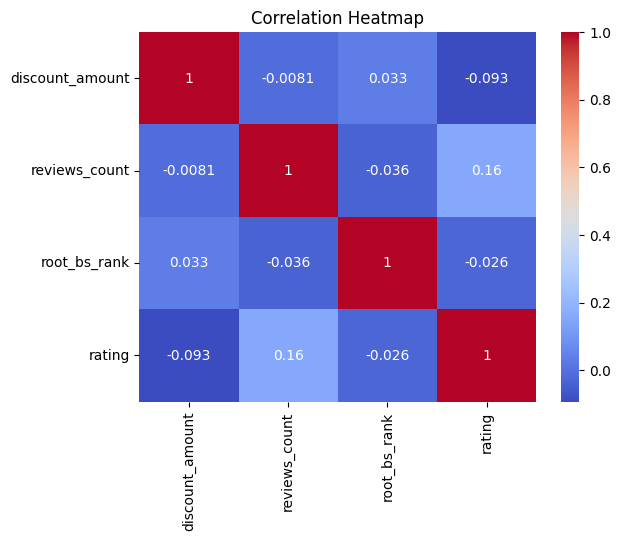

In [ ]:
numerical_variables = df.select_dtypes(['int64','float64']).drop(['initial_price','final_price'],axis=1).columns
numerical_variables = ['discount_amount','reviews_count','root_bs_rank','rating']
correlations = df[numerical_variables].corr(method='pearson')
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

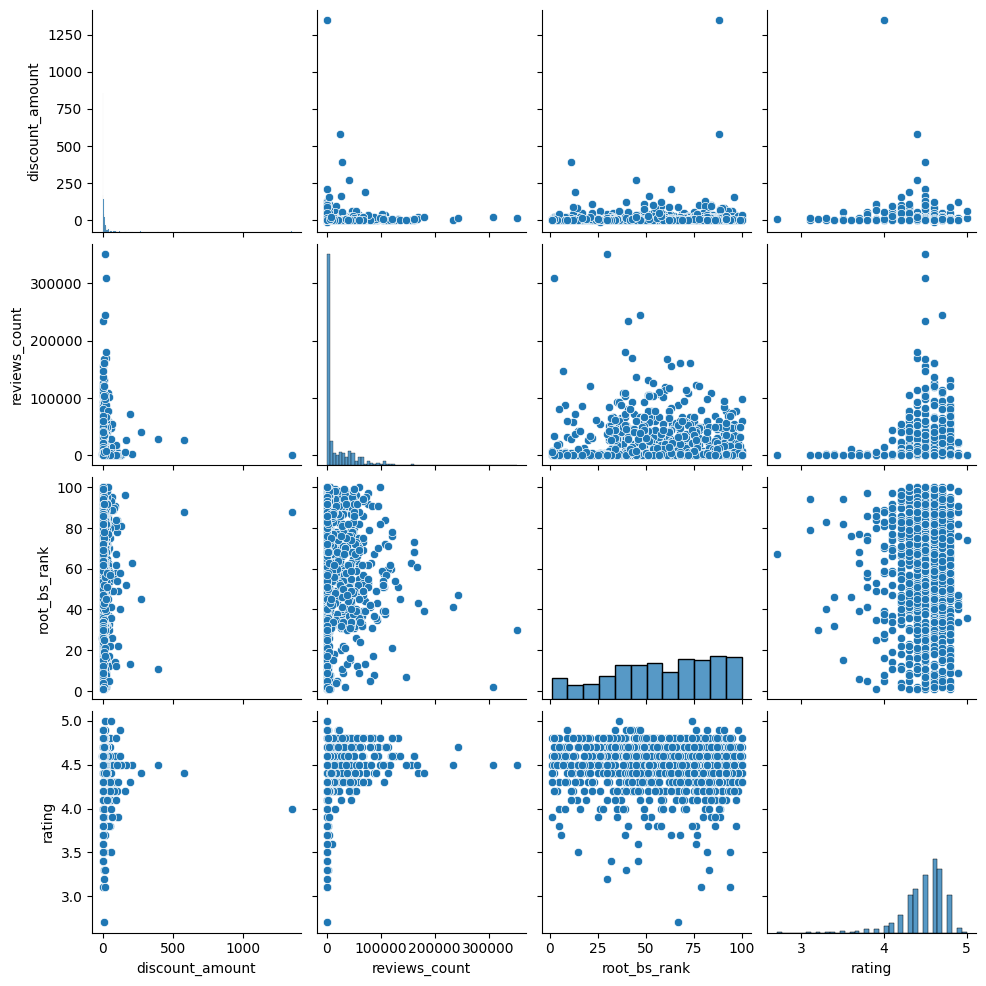

In [ ]:
sns.pairplot(df[numerical_variables])

Each numerical variable show no correlation at all between other variables

### Question: What is the distribution of discounted and non-discounted products ?

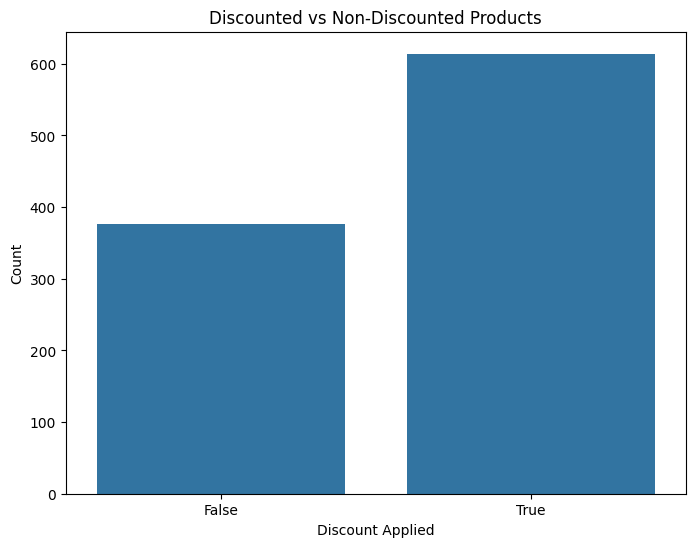

In [ ]:
# Analyze the discount column
discounted = df[df['discount'] == True]
not_discounted = df[df['discount'] == False]

plt.figure(figsize=(8, 6))
sns.countplot(x='discount', data=df)
plt.title('Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()


### Question: What is the effect of discounted products to the number of reviews?

In [ ]:
# Group by 'discount' and calculate mean and sum of 'reviews_count'
review_stats = df.groupby('discount')['reviews_count'].agg(['mean', 'sum']).reset_index()

# Display the calculated statistics
print(review_stats)

   discount          mean       sum
0     False  14024.628647   5287285
1      True  23860.441368  14650311


<ipython-input-45-ad34393482f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount', y='mean', data=review_stats, palette='Blues')
<ipython-input-45-ad34393482f2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount', y='sum', data=review_stats, palette='Greens')


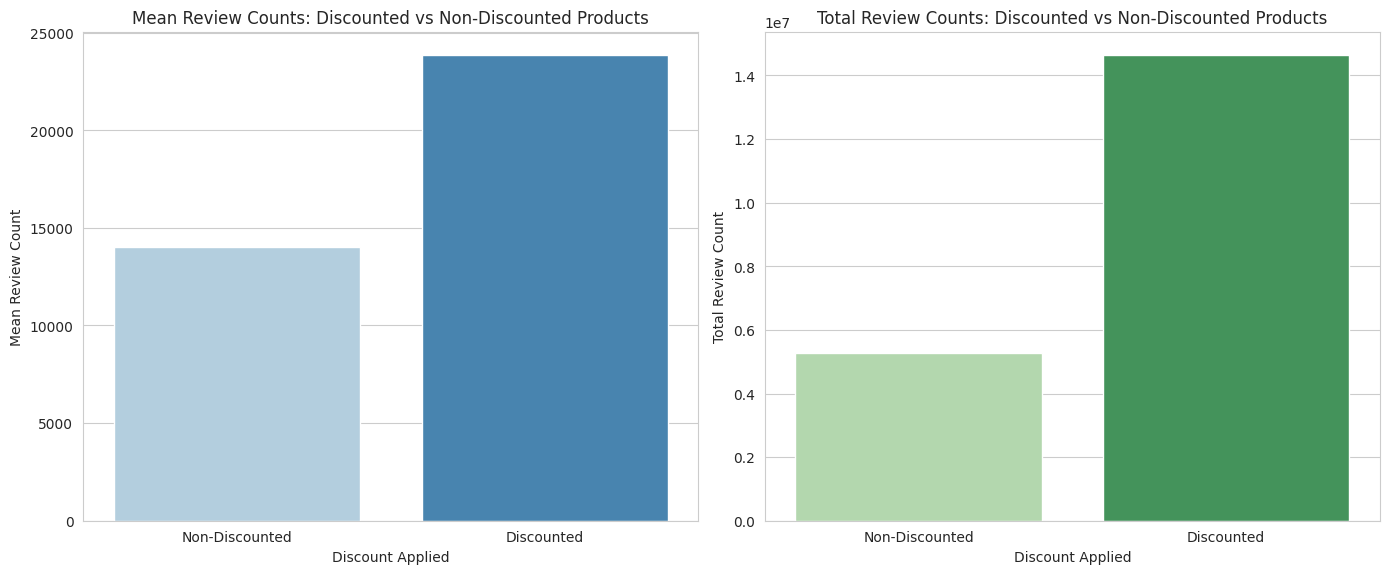

In [ ]:
# Set the plot size and style
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot the mean review counts
plt.subplot(1, 2, 1)
sns.barplot(x='discount', y='mean', data=review_stats, palette='Blues')
plt.title('Mean Review Counts: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Mean Review Count')
plt.xticks([0, 1], ['Non-Discounted', 'Discounted'])

# Plot the sum of review counts
plt.subplot(1, 2, 2)
sns.barplot(x='discount', y='sum', data=review_stats, palette='Greens')
plt.title('Total Review Counts: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Total Review Count')
plt.xticks([0, 1], ['Non-Discounted', 'Discounted'])

# Show the plot
plt.tight_layout()
plt.show()

### Question: Do discounted products produce higher rating?

In [ ]:
# Calculate the mean rating of discounted and non-discounted products
# Group by 'discount' and calculate the mean of 'rating'
rating_stats = df.groupby('discount')['rating'].mean().reset_index()

# Display the calculated statistics
print(rating_stats)


   discount    rating
0     False  4.478780
1      True  4.501629


<ipython-input-50-3498d8db2f99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount', y='rating', data=rating_stats, palette='husl')


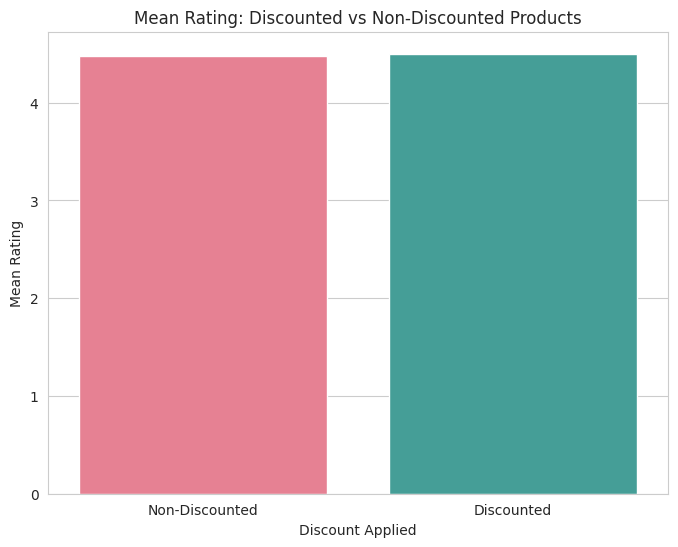

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create a bar plot for the mean rating
sns.barplot(x='discount', y='rating', data=rating_stats, palette='husl')

# Set the plot title and labels
plt.title('Mean Rating: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Mean Rating')
plt.xticks([0, 1], ['Non-Discounted', 'Discounted'])

# Show the plot
plt.show()


Discounted products produce a slightly higher rating than non-discounted products, but the difference is not statistically significant or substantial enough to indicate a strong impact of discounts on customer ratings.

### Question: What is the distribution of categories?

In [ ]:
# Count the number of products in each category
category_distribution = df['categories'].value_counts().reset_index()
category_distribution.columns = ['categories', 'count']

# Display the calculated distribution
print(category_distribution)


                             categories  count
0                           Electronics    542
1             Clothing, Shoes & Jewelry     80
2                        Home & Kitchen     63
3                    Health & Household     50
4                       Office Products     36
5                            Automotive     30
6                     Sports & Outdoors     23
7                 Arts, Crafts & Sewing     22
8                Beauty & Personal Care     20
9                          Pet Supplies     20
10                           Appliances     14
11            Cell Phones & Accessories     14
12                               Beauty     14
13              Industrial & Scientific     11
14                        Baby Products     11
15                         Toys & Games     10
16             Tools & Home Improvement      9
17                  Musical Instruments      7
18            Car & Vehicle Electronics      6
19                 Patio, Lawn & Garden      3
20           

<ipython-input-57-c1278c489799>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='categories', data=category_distribution, palette='viridis')


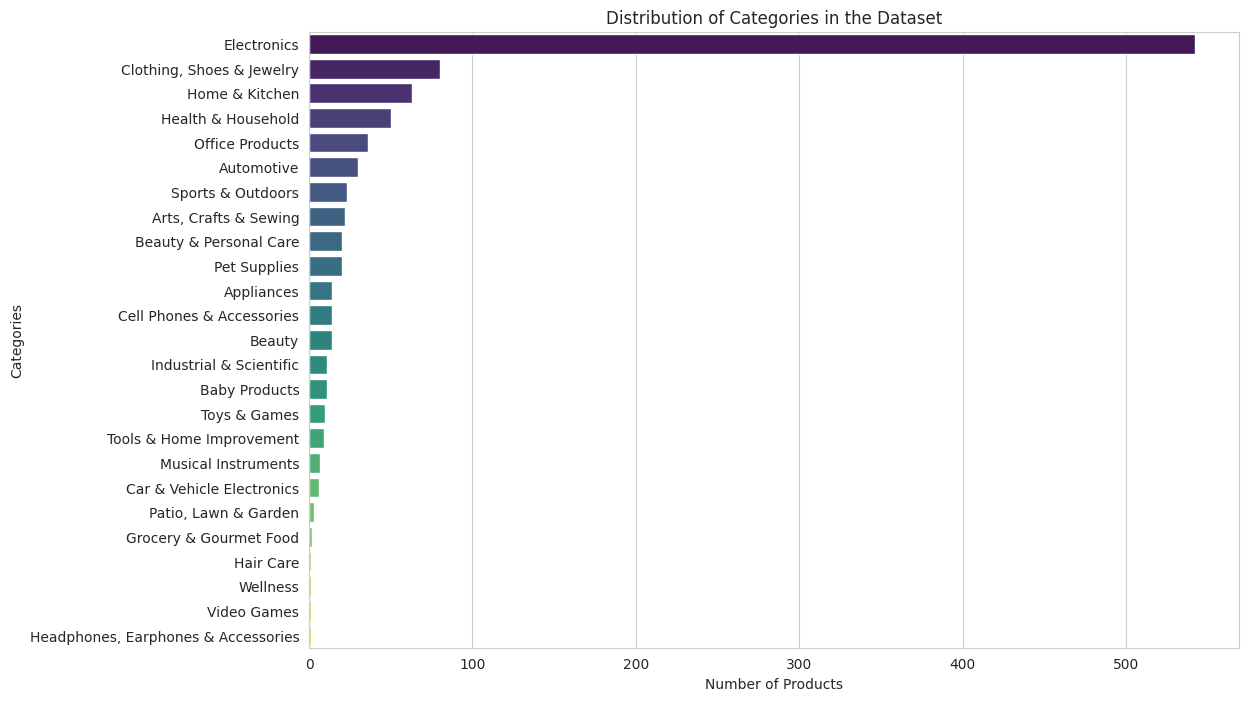

In [ ]:
# Set the plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create a bar plot for the distribution of categories
sns.barplot(x='count', y='categories', data=category_distribution, palette='viridis')

# Set the plot title and labels
plt.title('Distribution of Categories in the Dataset')
plt.xlabel('Number of Products')
plt.ylabel('Categories')

# Show the plot
plt.show()


Electonics is the category with highest number of products

### Question: For each category, what is the mean of product rating?

In [ ]:
# Calculate the mean rating for each category
category_rating = df.groupby('categories')['rating'].mean().reset_index()

# Sort the categories by mean rating for better visualization
category_rating = category_rating.sort_values(by='rating', ascending=False)

# Display the calculated mean ratings
print(category_rating)


                             categories    rating
17                      Office Products  4.738889
3                         Baby Products  4.718182
11                            Hair Care  4.700000
21             Tools & Home Improvement  4.666667
1                 Arts, Crafts & Sewing  4.659091
15              Industrial & Scientific  4.636364
2                            Automotive  4.633333
20                    Sports & Outdoors  4.630435
19                         Pet Supplies  4.630000
16                  Musical Instruments  4.614286
22                         Toys & Games  4.610000
12  Headphones, Earphones & Accessories  4.600000
10               Grocery & Gourmet Food  4.600000
5                Beauty & Personal Care  4.590000
14                       Home & Kitchen  4.582540
13                   Health & Household  4.512000
24                             Wellness  4.500000
6             Car & Vehicle Electronics  4.483333
0                            Appliances  4.457143


<ipython-input-60-a9db78308935>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='rating', y='categories', data=category_rating, palette='coolwarm')


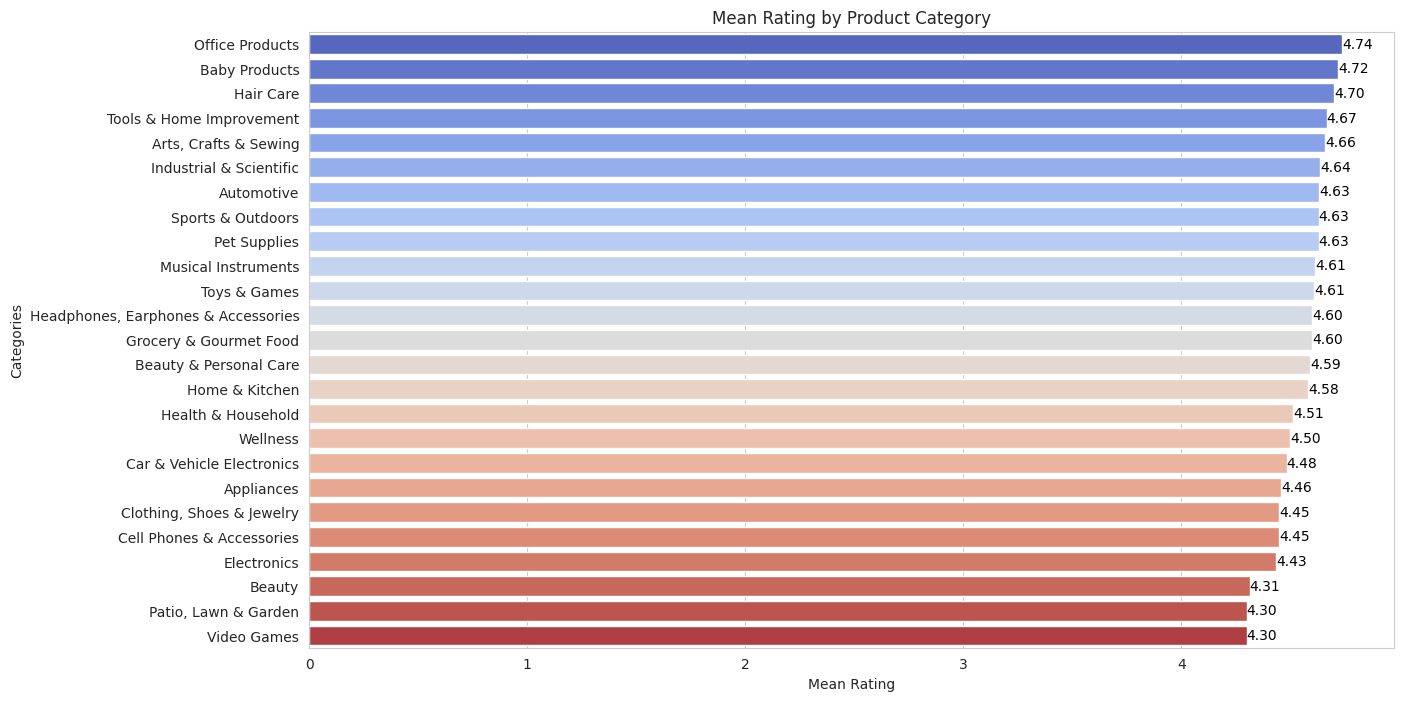

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a bar plot for the mean ratings by category
barplot = sns.barplot(x='rating', y='categories', data=category_rating, palette='coolwarm')

# Set the plot title and labels
plt.title('Mean Rating by Product Category')
plt.xlabel('Mean Rating')
plt.ylabel('Categories')

# Annotate the bars with the mean rating values
for index, value in enumerate(category_rating['rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black', fontsize=10)

# Show the plot
plt.show()


### Question: What is the top 20 products according to the rating?

In [ ]:
# Sort the dataframe by rating in descending order
top_rated_products = df.sort_values(by='rating', ascending=False)

# Select the top 20 products and get their name, category, and rating
top_20_products = top_rated_products[['rating', 'categories', 'product_name']].head(20)

# Display the DataFrame as a table
import tabulate

# Convert DataFrame to a list of lists
table = top_20_products.values.tolist()

# Print the table with headers
print(tabulate.tabulate(table, headers=top_20_products.columns, tablefmt='grid'))

+----------+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   rating | categories        | product_name                                                                                                                                                                                           |
+==========+===================+========================================================================================================================================================================================================+
|      5   | Electronics       | SMARTKLIK 1080p HD Mini Indoor Camera, WiFi Security Camera Pet Camera with Phone App Home Camera for Room/Baby/Dog, Night Vision, 2-Way Audio, Motion Detection for Home Security                     |
+----------+-------------------+--------------------------------

### Question: What is the top 20 products having highest number of reviews?

In [ ]:
# Sort the dataframe by reviews_count in descending order
top_reviewed_products = df.sort_values(by='reviews_count', ascending=False)

# Select the top 20 products and get their name, category, and review count
top_20_reviewed_products = top_reviewed_products[['reviews_count', 'categories', 'product_name']].head(20)

# Convert DataFrame to a list of lists
table = top_20_reviewed_products.values.tolist()

# Print the table with headers
print(tabulate.tabulate(table, headers=top_20_reviewed_products.columns, tablefmt='grid'))


+-----------------+---------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   reviews_count | categories                | product_name                                                                                                                                                                                            |
+=================+===========================+=========================================================================================================================================================================================================+
|          351754 | Home & Kitchen            | Mellanni Extra Deep Pocket King Size Sheets - 4 PC Iconic Collection Bedding Sheets & Pillowcases - Hotel Luxury, Ultra Soft, Cooling Bed Sheets - Extra Deep Pocket up to 21 inch (King, Aqua)         |


### Question: What are the most famous brand, by number of review and rating?

In [ ]:
# Group by brand and category, then sum the review counts
brand_category_review_counts = df.groupby(['brand', 'categories'])['reviews_count'].sum().reset_index()

# Sort by total review count in descending order
most_famous_brand_by_reviews = brand_category_review_counts.sort_values(by='reviews_count', ascending=False)

# Display the top brand
print(most_famous_brand_by_reviews.head(1))


       brand                 categories  reviews_count
451  Playtex  Clothing, Shoes & Jewelry         790106


In [ ]:
# Group by brand and category, then calculate the mean rating
brand_category_ratings = df.groupby(['brand', 'categories'])['rating'].mean().reset_index()

# Sort by average rating in descending order
most_famous_brand_by_ratings = brand_category_ratings.sort_values(by='rating', ascending=False)

# Display the top brand
print(most_famous_brand_by_ratings.head(1))


         brand   categories  rating
490  SMARTKLIK  Electronics     5.0
